In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import time
from datetime import datetime

In [2]:
thermometer_ordered = pd.read_csv("insights/results_experiment20180520213520.csv", sep=';', index_col=False)
thermometer_reverse_ordered = pd.read_csv("insights/results_experiment20180521051328.csv", sep=';', index_col=False)
one_hot_ordered = pd.read_csv("insights/results_experiment20180521155145.csv", sep=';', index_col=False)
one_hot_reverse_ordered = pd.read_csv("insights/results_experiment20180522001602.csv", sep=';', index_col=False)


In [3]:
thermometer_ordered.head()

,data_distribution,tuple_size,bleaching_active,total_training_time,avg_in_sample_evaluation_time,total_in_sample_evaluation_time,avg_out_sample_evaluation_time,total_out_sample_evaluation_time,total_training_data,total_correct_training,...,correctly_approved_test,wrongly_approved_test,percent_approved_correctly_test,total_reproved_test,correctly_reproved_test,wrongly_reproved_test,percent_reproved_correctly_test,total_ties,ties_for_zeros,ties_for_ones
0,5/5,1,False,0.013009,0.000782,0.007904,0.000811,147.676297,10,10,...,105490,18621,0.683487,27729,9108,48851,0.328465,18416,3044,15372
1,5/5,1,True,0.006279,0.001064,0.010753,0.000991,180.490107,10,9,...,116239,20859,0.753131,27729,6870,38102,0.247755,0,0,0
2,5/5,2,False,0.004458,0.000575,0.005810,0.000591,107.580183,10,10,...,114165,20375,0.739693,27729,7354,40176,0.265210,12343,1971,10372
3,5/5,2,True,0.004458,0.000674,0.006780,0.000657,119.591923,10,10,...,119711,21486,0.775627,27729,6243,34630,0.225143,0,0,0
4,5/5,3,False,0.006364,0.000565,0.005688,0.000513,93.353505,10,10,...,113380,20358,0.734607,27729,7371,40961,0.265823,10343,1582,8761


In [4]:
thermometer_ordered.columns

Index(['data_distribution', 'tuple_size', 'bleaching_active',
       'total_training_time', 'avg_in_sample_evaluation_time',
       'total_in_sample_evaluation_time', 'avg_out_sample_evaluation_time',
       'total_out_sample_evaluation_time', 'total_training_data',
       'total_correct_training', 'percent_correct_training',
       'total_approved_training', 'correctly_approved_training',
       'wrongly_approved_training', 'percent_approved_correctly_training',
       'total_reproved_training', 'correctly_reproved_training',
       'wrongly_reproved_training', 'percent_reproved_correctly_training',
       'total_test_data', 'total_correct_test', 'percent_correct_test',
       'total_approved_test', 'correctly_approved_test',
       'wrongly_approved_test', 'percent_approved_correctly_test',
       'total_reproved_test', 'correctly_reproved_test',
       'wrongly_reproved_test', 'percent_reproved_correctly_test',
       'total_ties', 'ties_for_zeros', 'ties_for_ones'],
      dtype='ob

In [5]:
dd55 = thermometer_ordered[(thermometer_ordered["data_distribution"] == "5/5") & (thermometer_ordered["bleaching_active"] == False)]
ddo55 = one_hot_ordered[(one_hot_ordered["data_distribution"] == "5/5") & (one_hot_ordered["bleaching_active"] == False)]
dd55

,data_distribution,tuple_size,bleaching_active,total_training_time,avg_in_sample_evaluation_time,total_in_sample_evaluation_time,avg_out_sample_evaluation_time,total_out_sample_evaluation_time,total_training_data,total_correct_training,...,correctly_approved_test,wrongly_approved_test,percent_approved_correctly_test,total_reproved_test,correctly_reproved_test,wrongly_reproved_test,percent_reproved_correctly_test,total_ties,ties_for_zeros,ties_for_ones
0,5/5,1,False,0.013009,0.000782,0.007904,0.000811,147.676297,10,10,...,105490,18621,0.683487,27729,9108,48851,0.328465,18416,3044,15372
2,5/5,2,False,0.004458,0.000575,0.005810,0.000591,107.580183,10,10,...,114165,20375,0.739693,27729,7354,40176,0.265210,12343,1971,10372
4,5/5,3,False,0.006364,0.000565,0.005688,0.000513,93.353505,10,10,...,113380,20358,0.734607,27729,7371,40961,0.265823,10343,1582,8761
6,5/5,4,False,0.004133,0.000461,0.004647,0.000462,84.034708,10,10,...,109806,19870,0.711451,27729,7859,44535,0.283422,10173,1509,8664
8,5/5,5,False,0.003455,0.000433,0.004365,0.000442,80.388608,10,10,...,99978,17827,0.647773,27729,9902,54363,0.357099,10727,1650,9077
10,5/5,6,False,0.003544,0.000418,0.004216,0.000424,77.132562,10,10,...,112702,20230,0.730214,27729,7499,41639,0.270439,9779,1536,8243
12,5/5,7,False,0.004339,0.000600,0.006046,0.000412,74.966300,10,10,...,100803,18110,0.653119,27729,9619,53538,0.346893,11379,1708,9671
14,5/5,8,False,0.003209,0.000394,0.003977,0.000403,73.403996,10,10,...,100720,18059,0.652581,27729,9670,53621,0.348732,15017,2294,12723
16,5/5,9,False,0.003229,0.000382,0.003860,0.000397,72.302740,10,10,...,90032,16082,0.583332,27729,11647,64309,0.420030,19367,3010,16357
18,5/5,10,False,0.003156,0.000384,0.003876,0.000387,70.482338,10,10,...,95249,17000,0.617133,27729,10729,59092,0.386923,20898,3299,17599


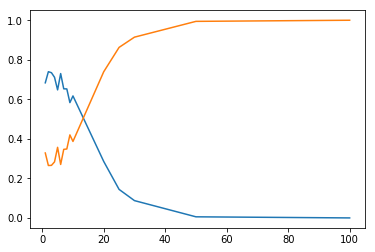

In [6]:
plt.plot(dd55["tuple_size"], dd55["percent_approved_correctly_test"])
plt.plot(dd55["tuple_size"], dd55["percent_reproved_correctly_test"])

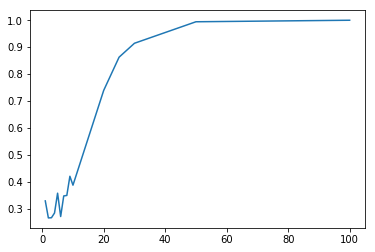

In [7]:
plt.plot(dd55["tuple_size"], dd55["percent_reproved_correctly_test"])

In [8]:
dd55["percent_correct_test"]

0     0.629417
2     0.667430
4     0.663212
6     0.646262
8     0.603504
10    0.660191
12    0.606481
14    0.606305
16    0.558461
18    0.582073
20    0.354853
22    0.253683
24    0.213506
26    0.156193
28    0.152321
Name: percent_correct_test, dtype: float64

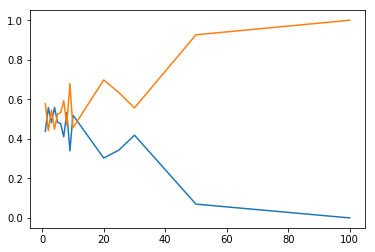

In [9]:
plt.plot(ddo55["tuple_size"], ddo55["percent_approved_correctly_test"])
plt.plot(ddo55["tuple_size"], ddo55["percent_reproved_correctly_test"])

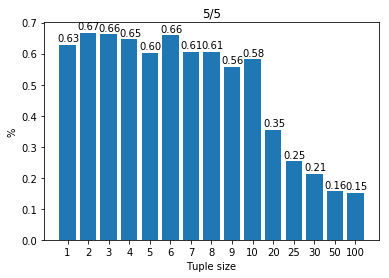

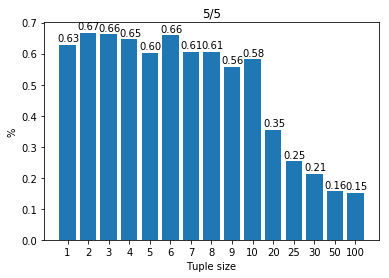

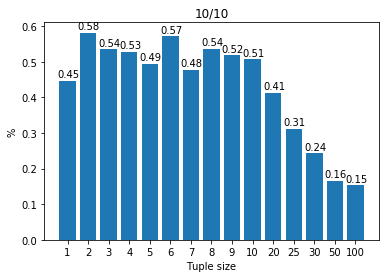

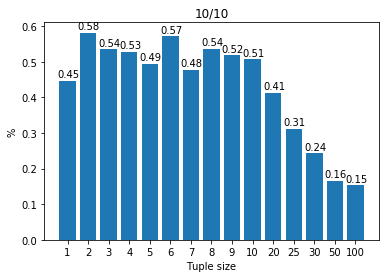

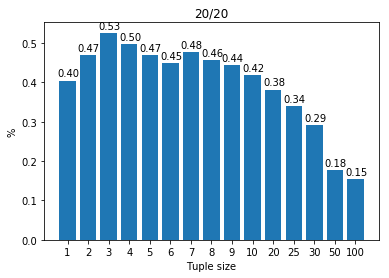

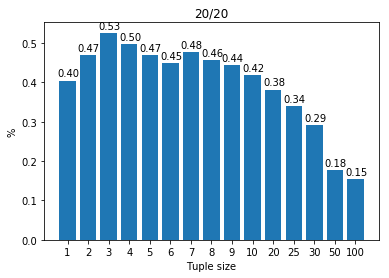

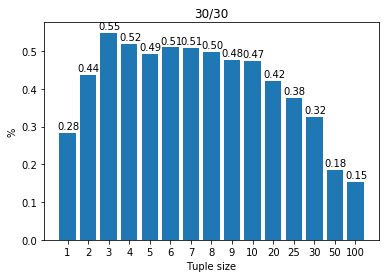

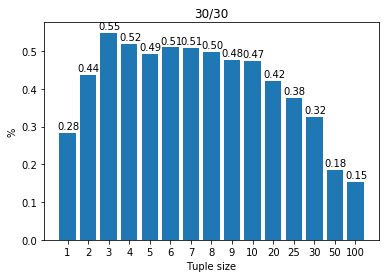

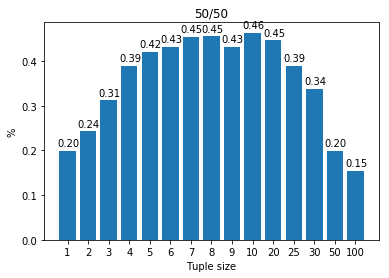

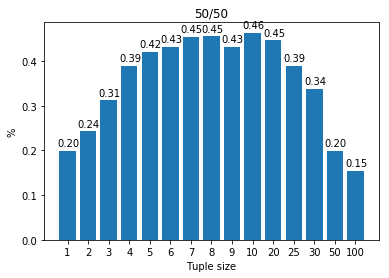

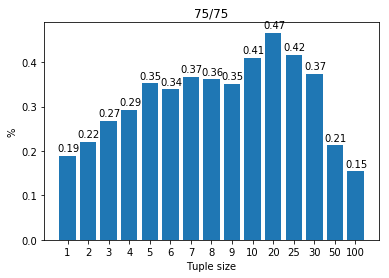

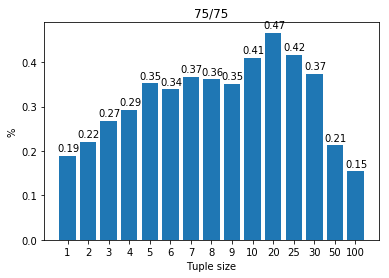

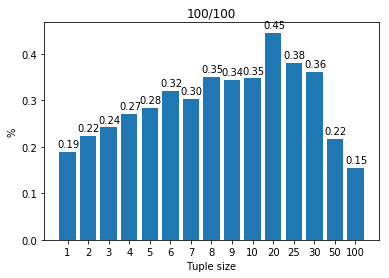

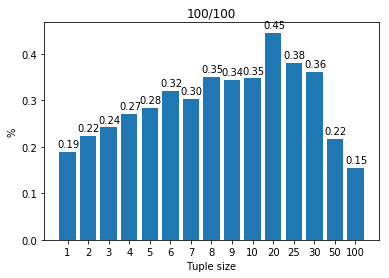

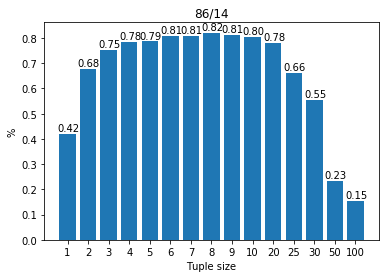

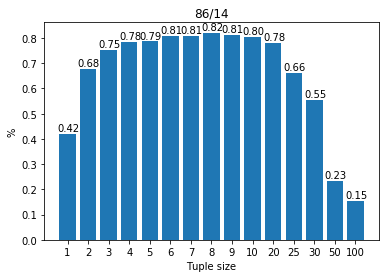

In [10]:
# training_set_distribuitions = [[5, 5], [10, 10], [20, 20], [30, 30], [50, 50], [75, 75], [86, 14], [100, 100]]
distributions = ["5/5","10/10","20/20","30/30","50/50","75/75","100/100", "86/14"]

dataframe = thermometer_ordered

for distribution in distributions:
    for bleaching_mode in [False, True]:
        dd = thermometer_ordered[(dataframe["data_distribution"] == distribution) & (dataframe["bleaching_active"] == False)]

        fig, ax = plt.subplots()
        #ax.yaxis.set_major_formatter(formatter)

        x = range(len(dd["percent_correct_test"]))
        plt.bar(x, height=dd["percent_correct_test"],  width = 0.8)
        plt.xticks(x, dd["tuple_size"])

        for a,b in zip(x, dd["percent_correct_test"]):
            plt.text(a - 0.5, b + 0.01, str("{0:.2f}".format(b)))

        plt.title(distribution)
        plt.ylabel("%")
        plt.xlabel("Tuple size")

        plt.show()


In [11]:
def plot_data(distributions, dataframe, filename):
    width = 0.35
    i = 0
    
    letters = ["a)", "b)", "c)", "d)", "e)", "f)", "g)", "h)"]
    
    line = {
        0:0,
        1:0,
        2:1,
        3:1,
        4:2,
        5:2,
        6:3,
        7:3,
    }
    
    fig, ax = plt.subplots(4, 2, sharex = False, figsize=(20, 40))
    #plt.set_title("Percentage of correct answers (bars) and performance in the \"reproved\" class (lines) in a test set for a WiSARD")
    
    #print(ax)

    for i in range(len(distributions)):
        #for bleaching_mode in [False, True]:
        dd = dataframe[(dataframe["data_distribution"] == distributions[i]) & (dataframe["bleaching_active"] == False)]
        bd = dataframe[(dataframe["data_distribution"] == distributions[i]) & (dataframe["bleaching_active"] == True)]
        
        #ax.yaxis.set_major_formatter(formatter)

        x = np.arange(len(dd["percent_correct_test"]))
        rects1 = ax[line[i],i % 2].bar(x, height=dd["percent_correct_test"], color="green", width = width)
        rects2 = ax[line[i],i % 2].bar(x + width, height=bd["percent_correct_test"], color="orange", width = width)
        #

        for a,b in zip(x, dd["percent_correct_test"]):
            ax[line[i],i % 2].text(a - 0.2, b + 0.01, str("{0:.2f}".format(b)))

        for a,b in zip(x, bd["percent_correct_test"]):
            ax[line[i],i % 2].text(a + width - 0.2, b + 0.01, str("{0:.2f}".format(b)))
            
        rects3 = ax[line[i],i % 2].plot(x, dd["percent_reproved_correctly_test"], color="blue")
        rects4 = ax[line[i],i % 2].plot(x, bd["percent_reproved_correctly_test"], color="red")

        ax[line[i],i % 2].set_title(letters[i] + " Distribuicao do training set de " + distributions[i])
        ax[line[i],i % 2].set_ylabel("% reconhecido corretamente")
        ax[line[i],i % 2].set_xlabel("Tamanho da tupla")

        ax[line[i],i % 2].set_xticks(x + width / 2)
        ax[line[i],i % 2].set_xticklabels(dd["tuple_size"])
        ax[line[i],i % 2].legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Padrao', 'Bleaching', 'Padrao (classe "reproved")', 'Bleaching (classe "reproved")'))

    #plt.show()
    
    plt.savefig("plots/" + filename + ".png")
    
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
#ax1.plot(x, y)
#ax1.set_title('Sharing x per column, y per row')
#ax2.scatter(x, y)
#ax3.scatter(x, 2 * y ** 2 - 1, color='r')
#ax4.plot(x, 2 * y ** 2 - 1, color='r')

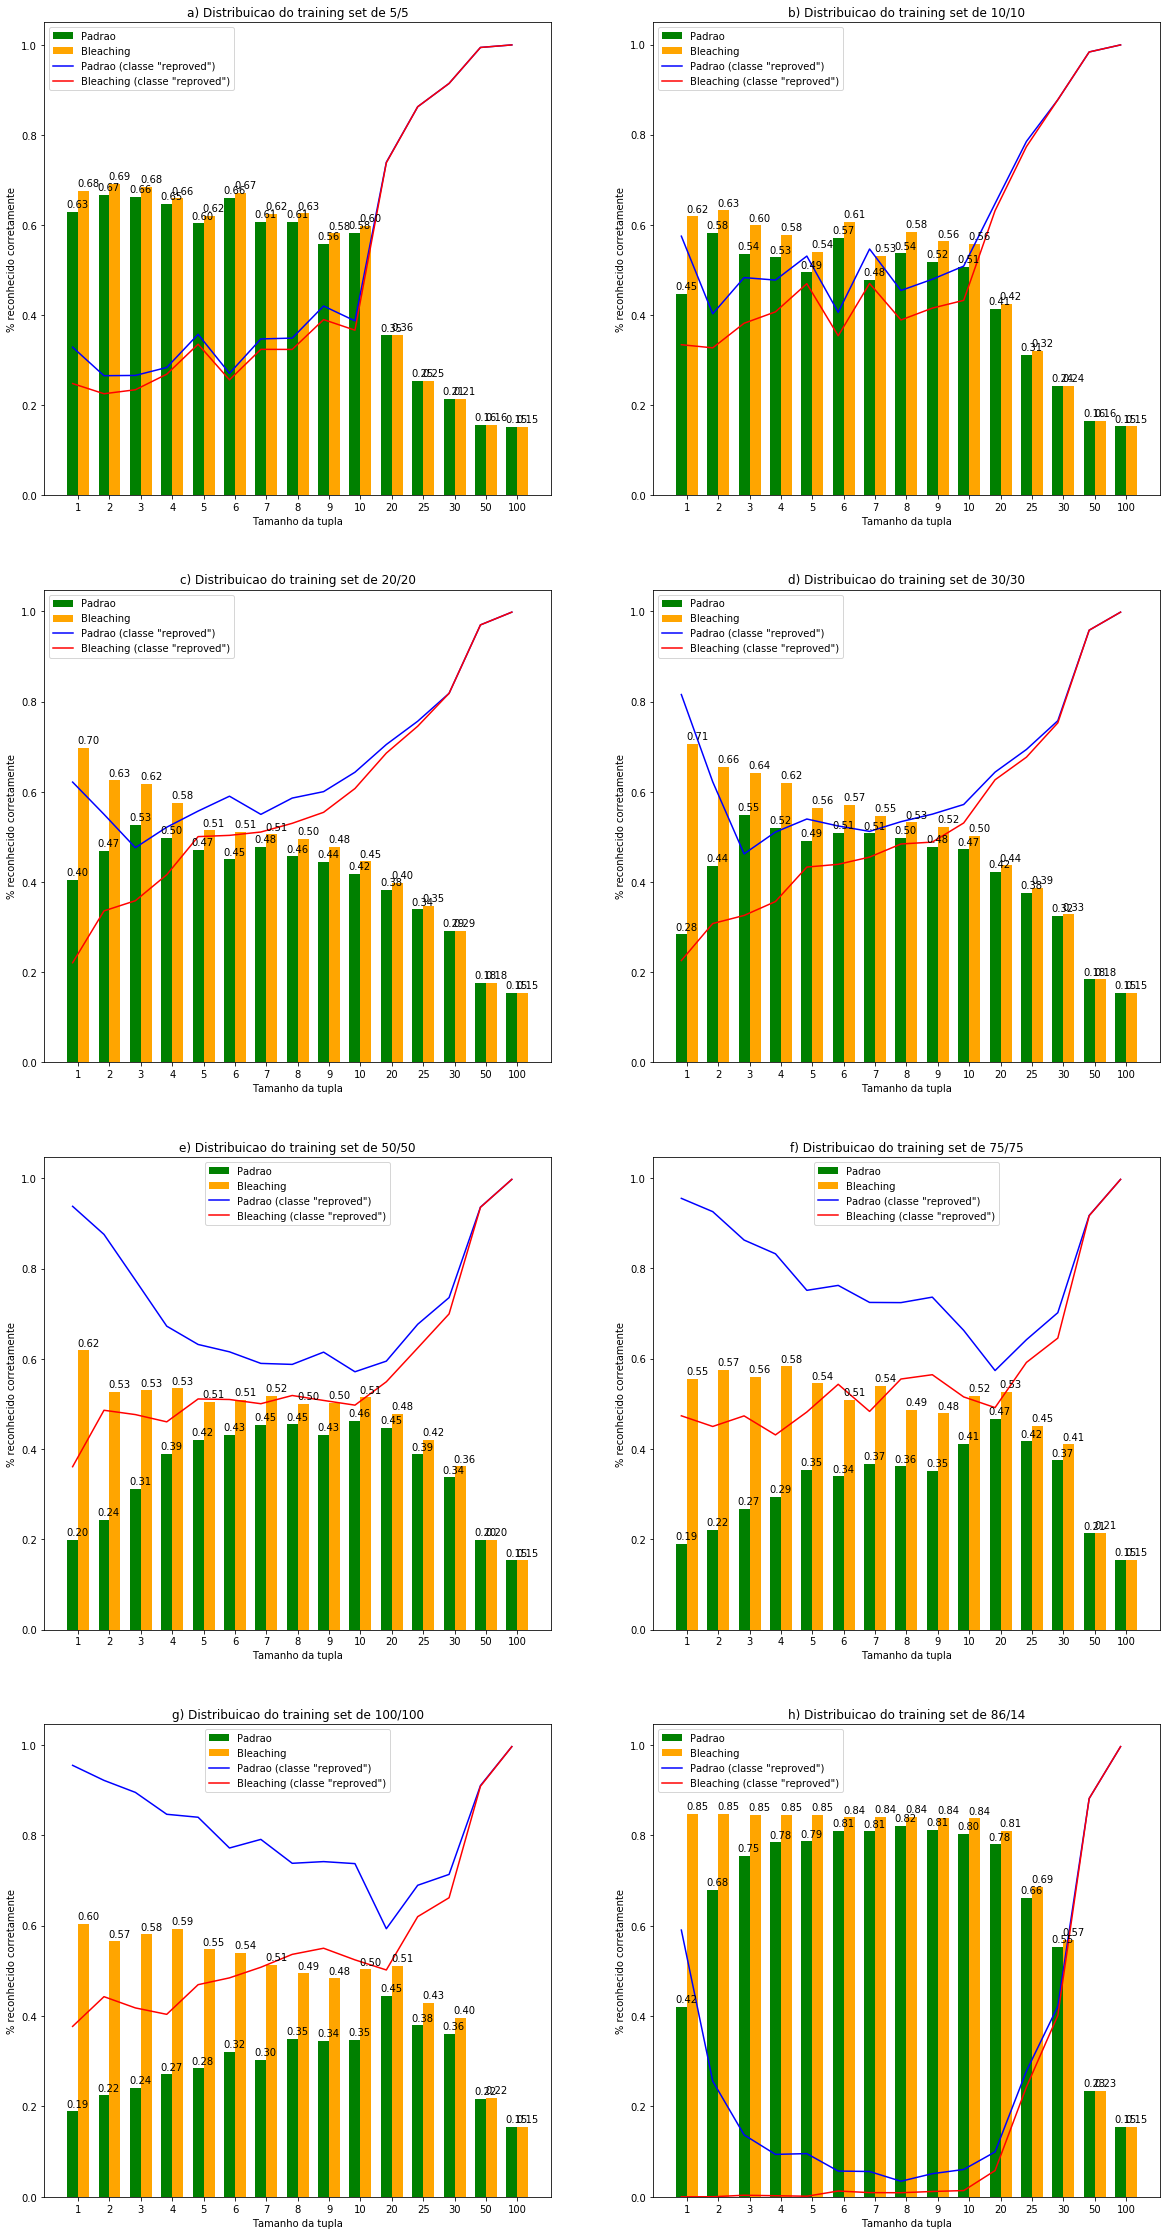

In [12]:
distributions = ["5/5","10/10","20/20","30/30","50/50","75/75","100/100", "86/14"]

plot_data(distributions, thermometer_ordered, "thermometer_ordered")

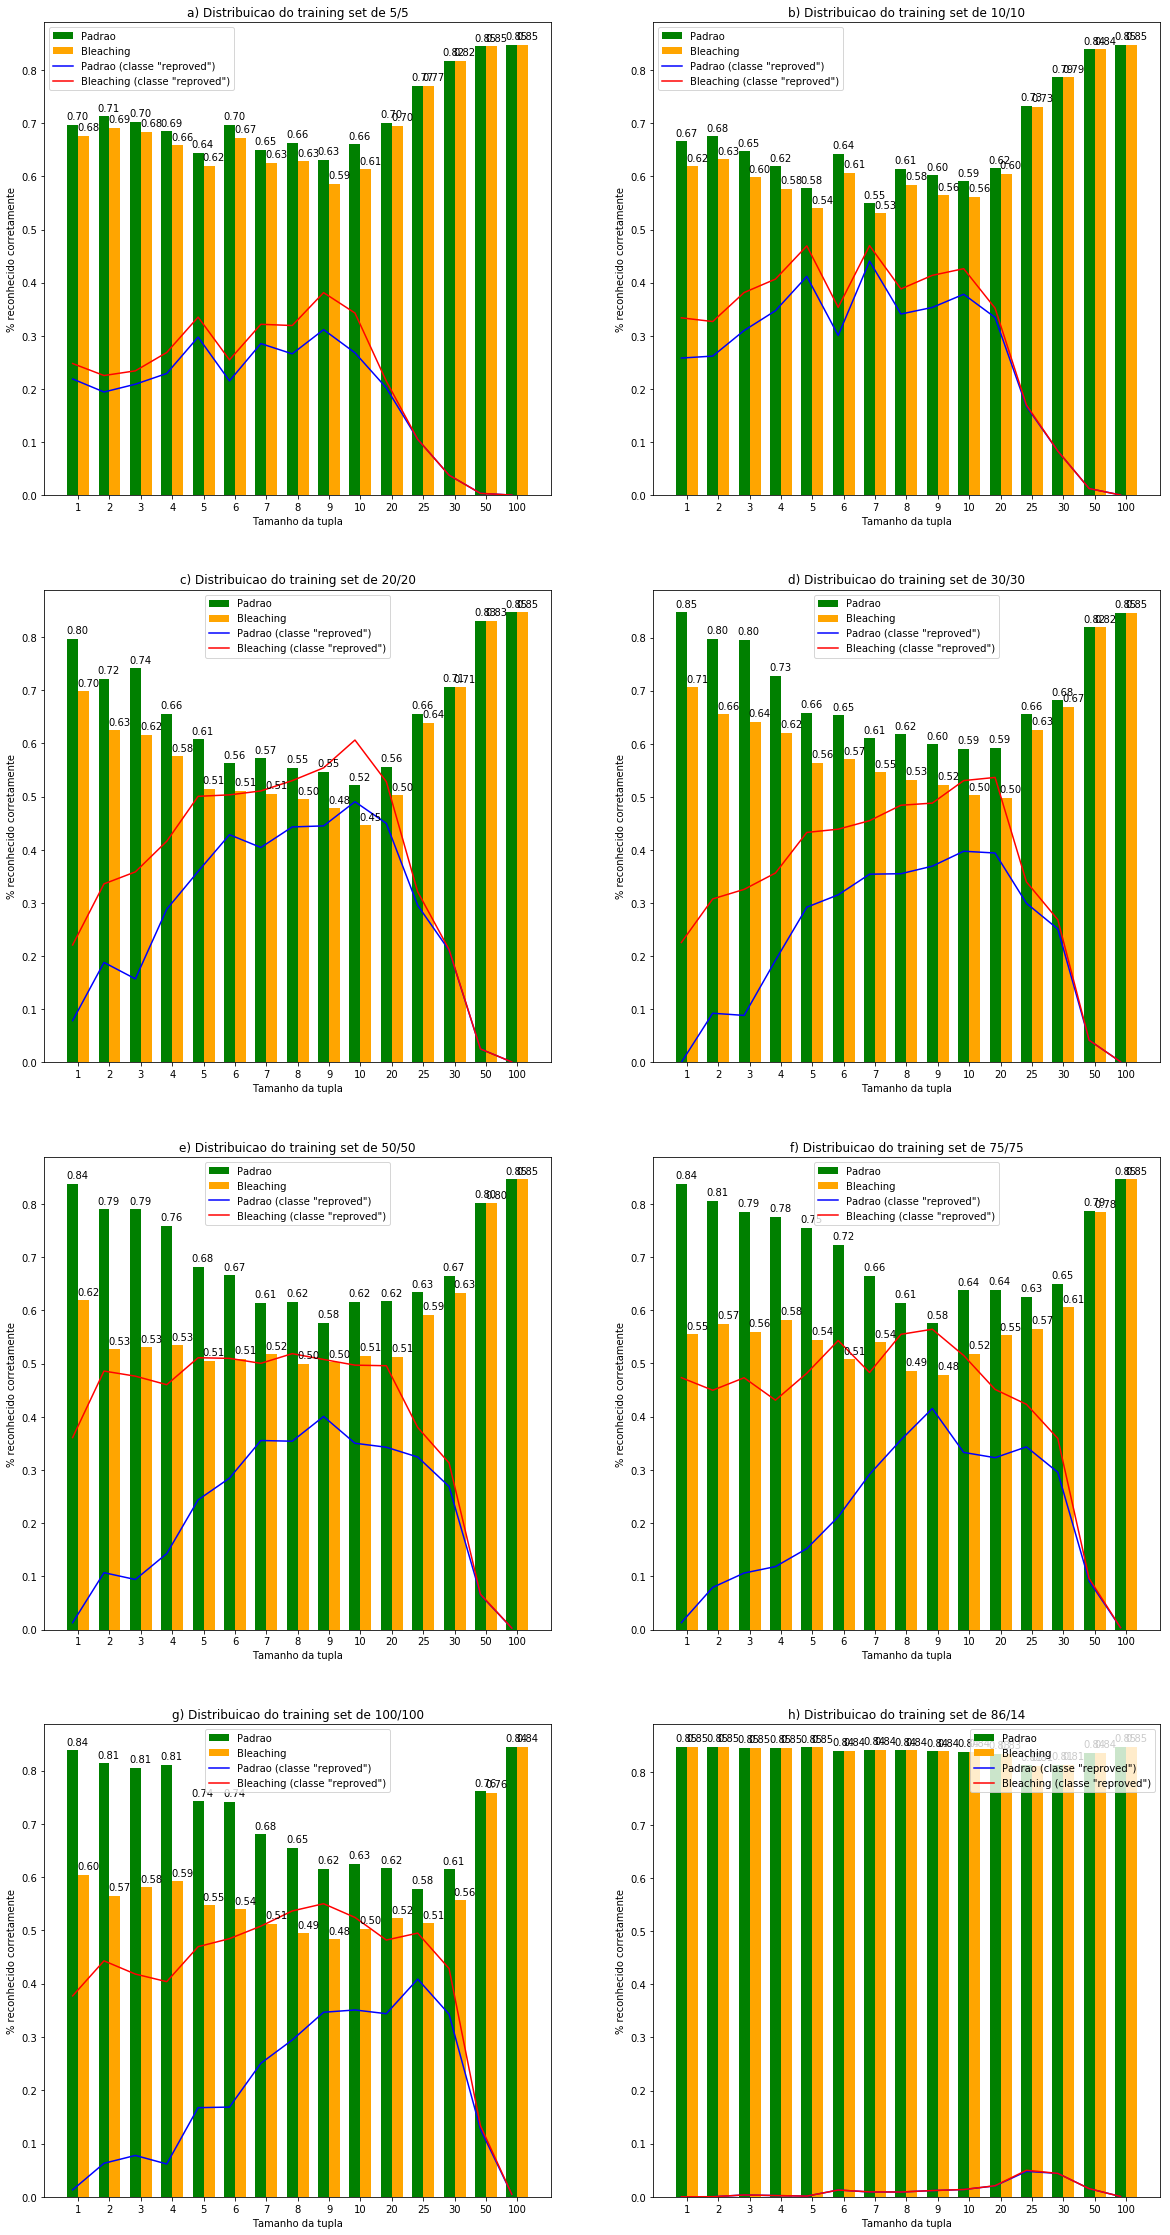

In [13]:
plot_data(distributions, thermometer_reverse_ordered, "thermometer_reverse_ordered")

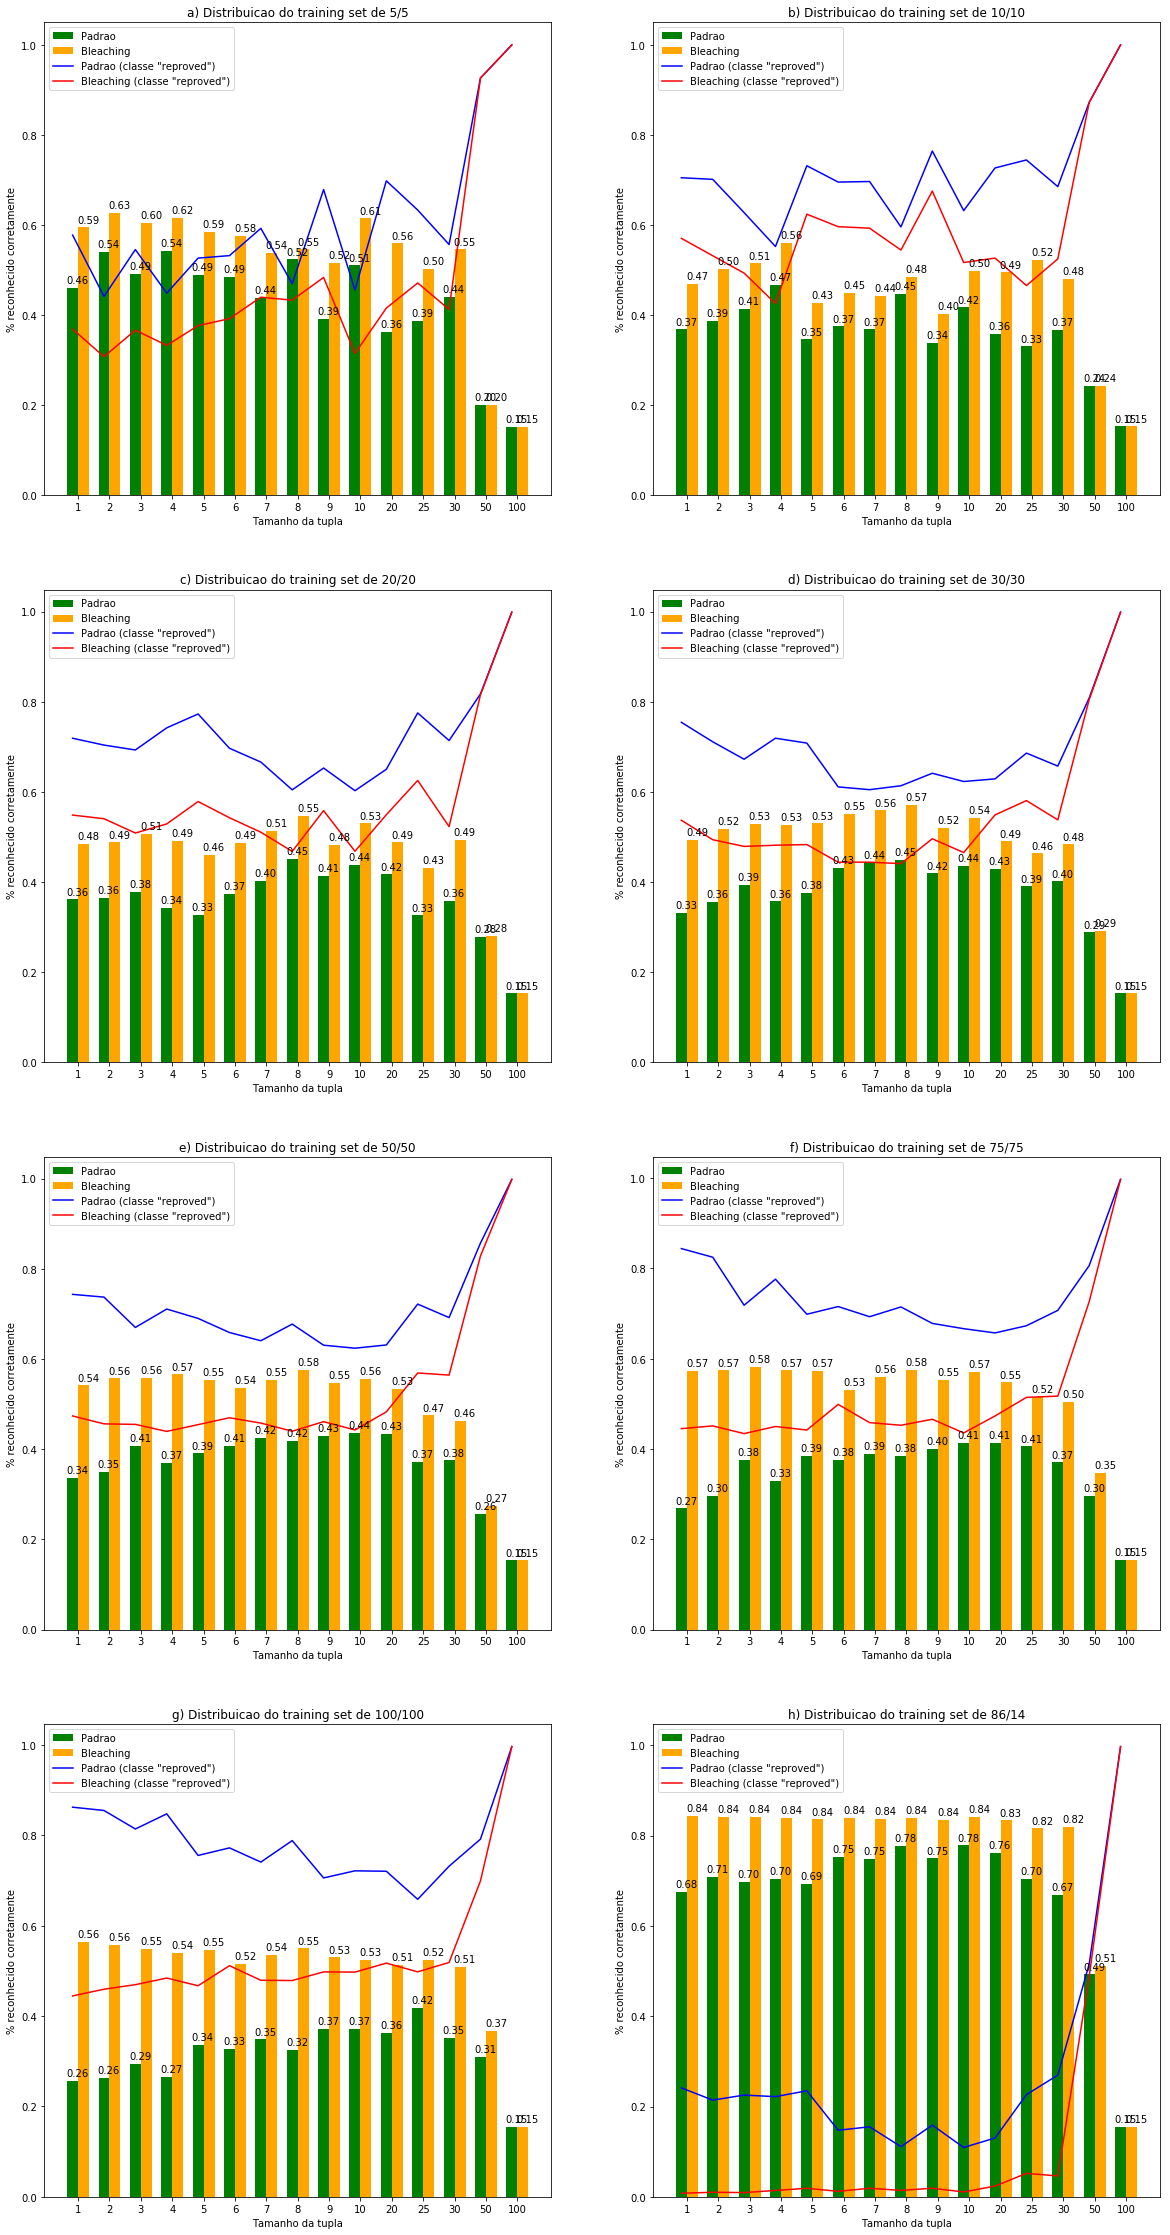

In [14]:
plot_data(distributions, one_hot_ordered, "one_hot_ordered")

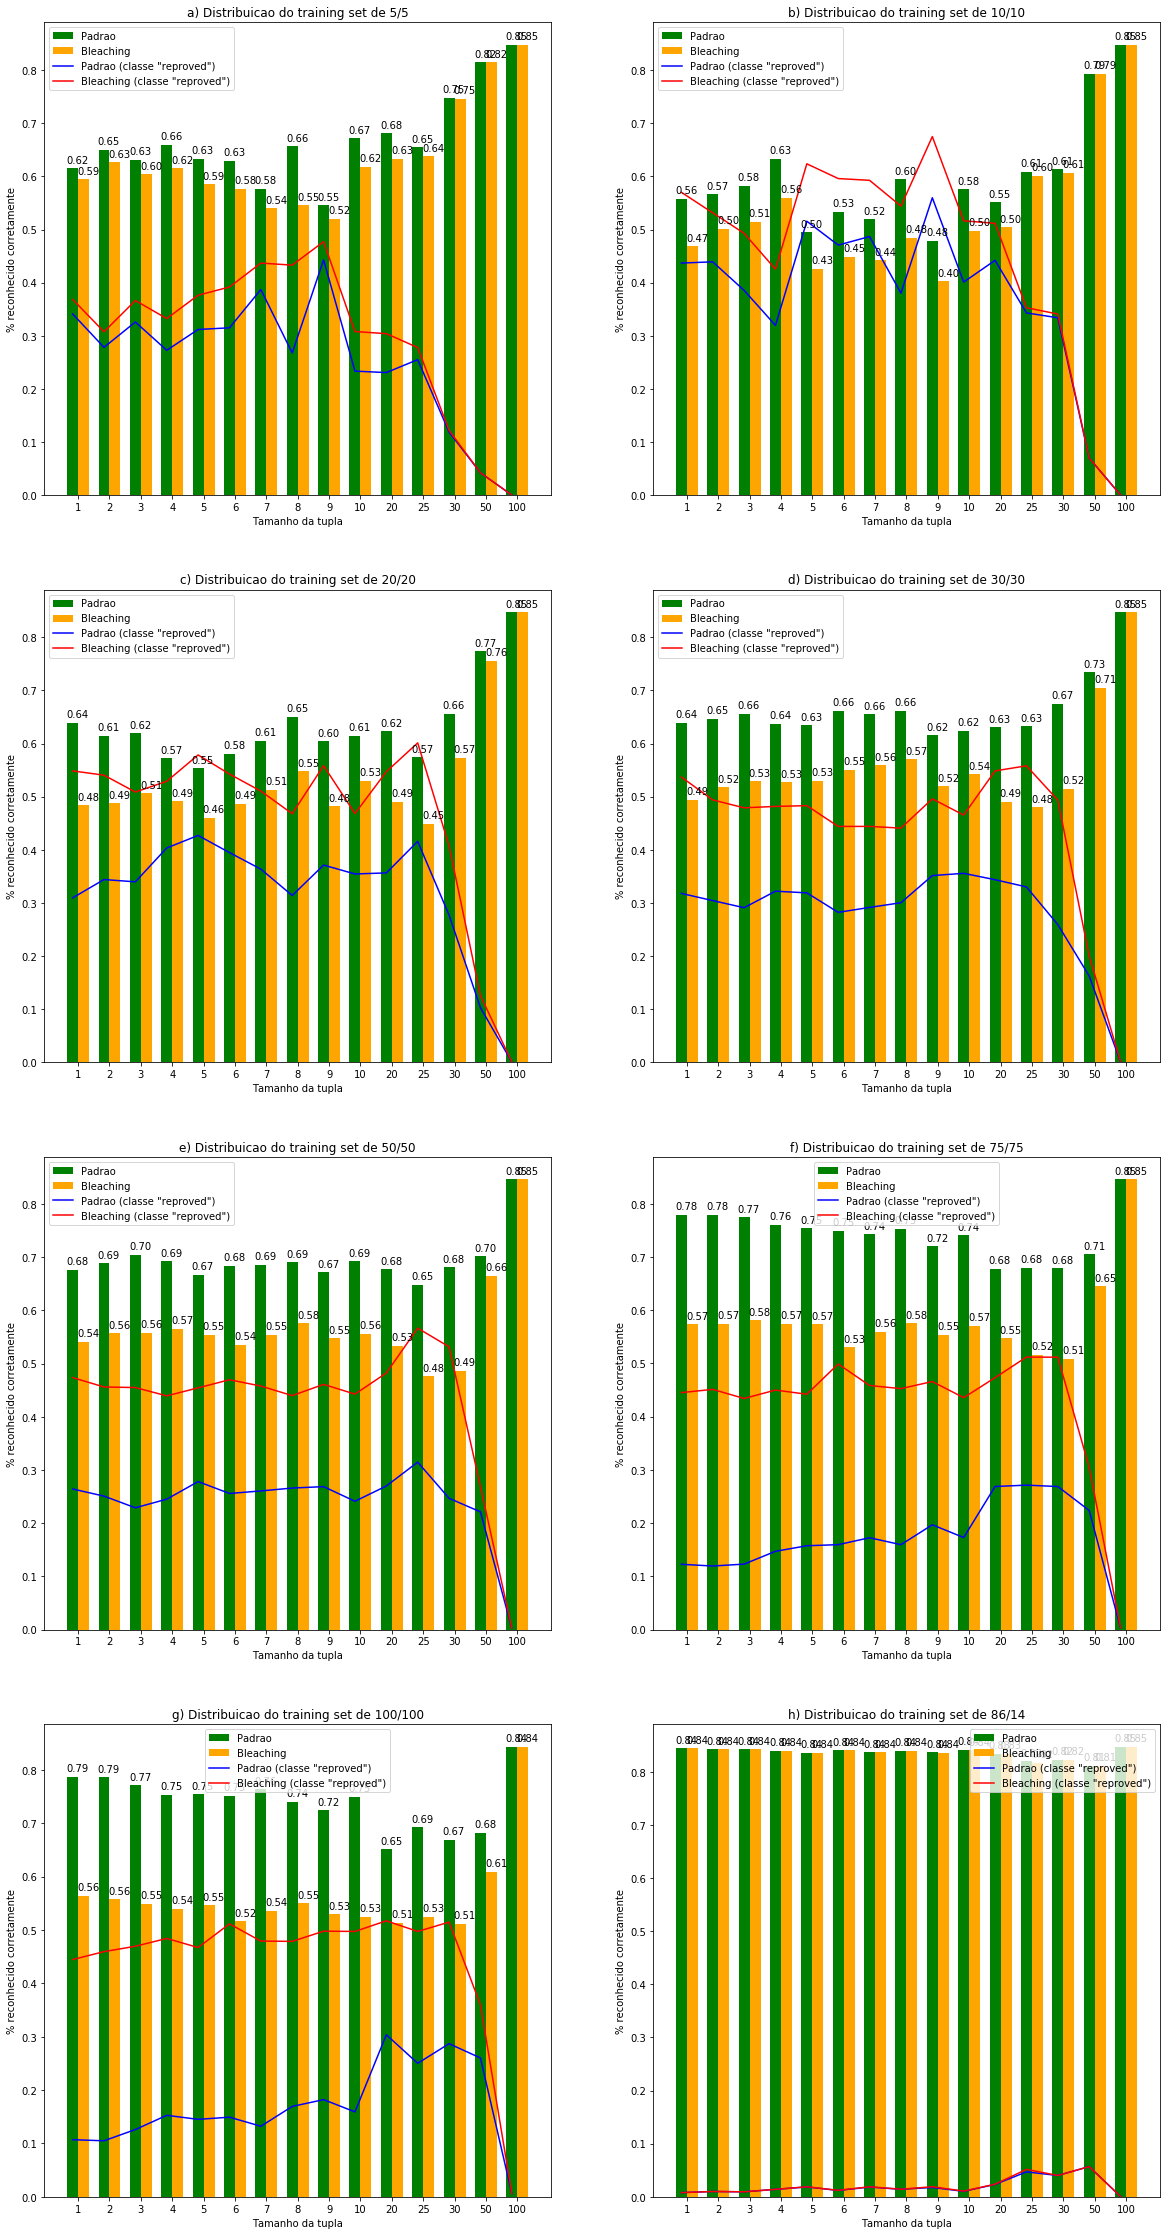

In [15]:
plot_data(distributions, one_hot_reverse_ordered, "one_hot_reverse_ordered")

In [16]:
math = pd.read_csv("insights/results_experiment_combined20180521215357.csv", sep=';', index_col=False)
health = pd.read_csv("insights/results_experiment_combined20180522041110.csv", sep=';', index_col=False)
warmth = pd.read_csv("insights/results_experiment_combined20180522010813.csv", sep=';', index_col=False)
special = pd.read_csv("insights/results_experiment_combined20180522012744.csv", sep=';', index_col=False)
history = pd.read_csv("insights/results_experiment_combined20180522015855.csv", sep=';', index_col=False)
music = pd.read_csv("insights/results_experiment_combined20180522022853.csv", sep=';', index_col=False)
applied = pd.read_csv("insights/results_experiment_combined20180522030344.csv", sep=';', index_col=False)
literacy = pd.read_csv("insights/results_experiment_combined20180522170212.csv", sep=';', index_col=False)

In [17]:
datasets = [applied, health, history, literacy, math, music, special, warmth]
main_cats = ["applied", "health", "history", "literacy", "math", "music", "special", "warmth"]
categories_real_names = ["Applied Learning", "Health and Sports", "History and Civics", 
                        "Literacy and Language", "Math and Science", "Music and The Arts", "Special Needs", "Warmth, Care and Hunger"]
distributions = ["1000/1000", "1000/1000", "500/500", "1000/1000", "1000/1000", "500/500", "500/500", "100/100"]

for i in range(len(datasets)):
    datasets[i]["main_cat_abrev"] =  main_cats[i]

concatenated = pd.concat(datasets, ignore_index=True)
concatenated

,data_distribution,tuple_size,bleaching_active,total_training_time,avg_in_sample_evaluation_time,total_in_sample_evaluation_time,avg_out_sample_evaluation_time,total_out_sample_evaluation_time,total_training_data,total_correct_training,...,wrongly_approved_test,percent_approved_correctly_test,total_reproved_test,correctly_reproved_test,wrongly_reproved_test,percent_reproved_correctly_test,total_ties,ties_for_zeros,ties_for_ones,main_cat_abrev
0,1000/1000,2,False,29.302194,0.023990,47.980808,0.024250,359.168183,2000,1655,...,599,0.371092,1984,1385,8067,0.698085,6218,954,5264,applied
1,1000/1000,2,True,30.760247,0.046124,92.247766,0.042460,628.871075,2000,1761,...,1131,0.614251,1984,853,4948,0.429940,0,0,0,applied
2,1000/1000,5,False,22.597593,0.016559,33.119485,0.017591,260.537740,2000,1775,...,685,0.400172,1984,1299,7694,0.654738,5227,782,4445,applied
3,1000/1000,5,True,22.809809,0.025075,50.151700,0.028114,416.396605,2000,1841,...,1147,0.608638,1984,837,5020,0.421875,0,0,0,applied
4,1000/1000,8,False,22.550673,0.015919,31.838817,0.014738,218.278565,2000,1862,...,730,0.422078,1984,1254,7413,0.632056,4599,693,3906,applied
5,1000/1000,8,True,21.853085,0.018190,36.382240,0.020383,301.893494,2000,1903,...,1112,0.602089,1984,872,5104,0.439516,0,0,0,applied
6,1000/1000,10,False,21.173150,0.014210,28.421169,0.014186,210.108335,2000,1895,...,739,0.424105,1984,1245,7387,0.627520,4196,611,3585,applied
7,1000/1000,10,True,21.109007,0.016329,32.658655,0.018228,269.971989,2000,1916,...,1077,0.590239,1984,907,5256,0.457157,0,0,0,applied
8,1000/1000,2,False,32.456055,0.025422,50.851209,0.024822,490.340680,2000,1722,...,882,0.450980,2312,1430,9576,0.618512,7798,1134,6664,health
9,1000/1000,2,True,30.976089,0.049130,98.262245,0.047061,929.642762,2000,1711,...,1610,0.702901,2312,702,5182,0.303633,0,0,0,health


In [18]:
def plot_data2(categories, categories_real_names, distribuitions, dataframe, filename):
    width = 0.35
    i = 0
    
    letters = ["a)", "b)", "c)", "d)", "e)", "f)", "g)", "h)"]
    
    line = {
        0:0,
        1:0,
        2:1,
        3:1,
        4:2,
        5:2,
        6:3,
        7:3,
    }
    
    fig, ax = plt.subplots(4, 2, sharex = False, figsize=(20, 40))
    #plt.set_title("Percentage of correct answers (bars) and performance in the \"reproved\" class (lines) in a test set for a WiSARD")
    
    #print(ax)

    for i in range(len(categories)):
        dd = dataframe[(dataframe["main_cat_abrev"] == categories[i]) & (dataframe["bleaching_active"] == False)]
        bd = dataframe[(dataframe["main_cat_abrev"] == categories[i]) & (dataframe["bleaching_active"] == True)]
        
        #ax.yaxis.set_major_formatter(formatter)

        x = np.arange(len(dd["percent_correct_test"]))
        rects1 = ax[line[i],i % 2].bar(x, height=dd["percent_correct_test"], color="green", width = width)
        rects2 = ax[line[i],i % 2].bar(x + width, height=bd["percent_correct_test"], color="orange", width = width)
        #

        for a,b in zip(x, dd["percent_correct_test"]):
            ax[line[i],i % 2].text(a - 0.2, b + 0.01, str("{0:.2f}".format(b)))

        for a,b in zip(x, bd["percent_correct_test"]):
            ax[line[i],i % 2].text(a + width - 0.2, b + 0.01, str("{0:.2f}".format(b)))
            
        rects3 = ax[line[i],i % 2].plot(x, dd["percent_reproved_correctly_test"], color="blue")
        rects4 = ax[line[i],i % 2].plot(x, bd["percent_reproved_correctly_test"], color="red")

        ax[line[i],i % 2].set_title(letters[i] + " Resultados dos testes para categoria " + categories_real_names[i] + "\ncom training set de distribuicao " + distributions[i])
        ax[line[i],i % 2].set_ylabel("% reconhecido corretamente")
        ax[line[i],i % 2].set_xlabel("Tamanho da tupla")

        ax[line[i],i % 2].set_xticks(x + width / 2)
        ax[line[i],i % 2].set_xticklabels(dd["tuple_size"])
        ax[line[i],i % 2].legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Padrao', 'Bleaching', 'Padrao (classe "reproved")', 'Bleaching (classe "reproved")'), loc="lower right")

    #plt.show()
    
    plt.savefig("plots/" + filename + ".png")
    
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
#ax1.plot(x, y)
#ax1.set_title('Sharing x per column, y per row')
#ax2.scatter(x, y)
#ax3.scatter(x, 2 * y ** 2 - 1, color='r')
#ax4.plot(x, 2 * y ** 2 - 1, color='r')

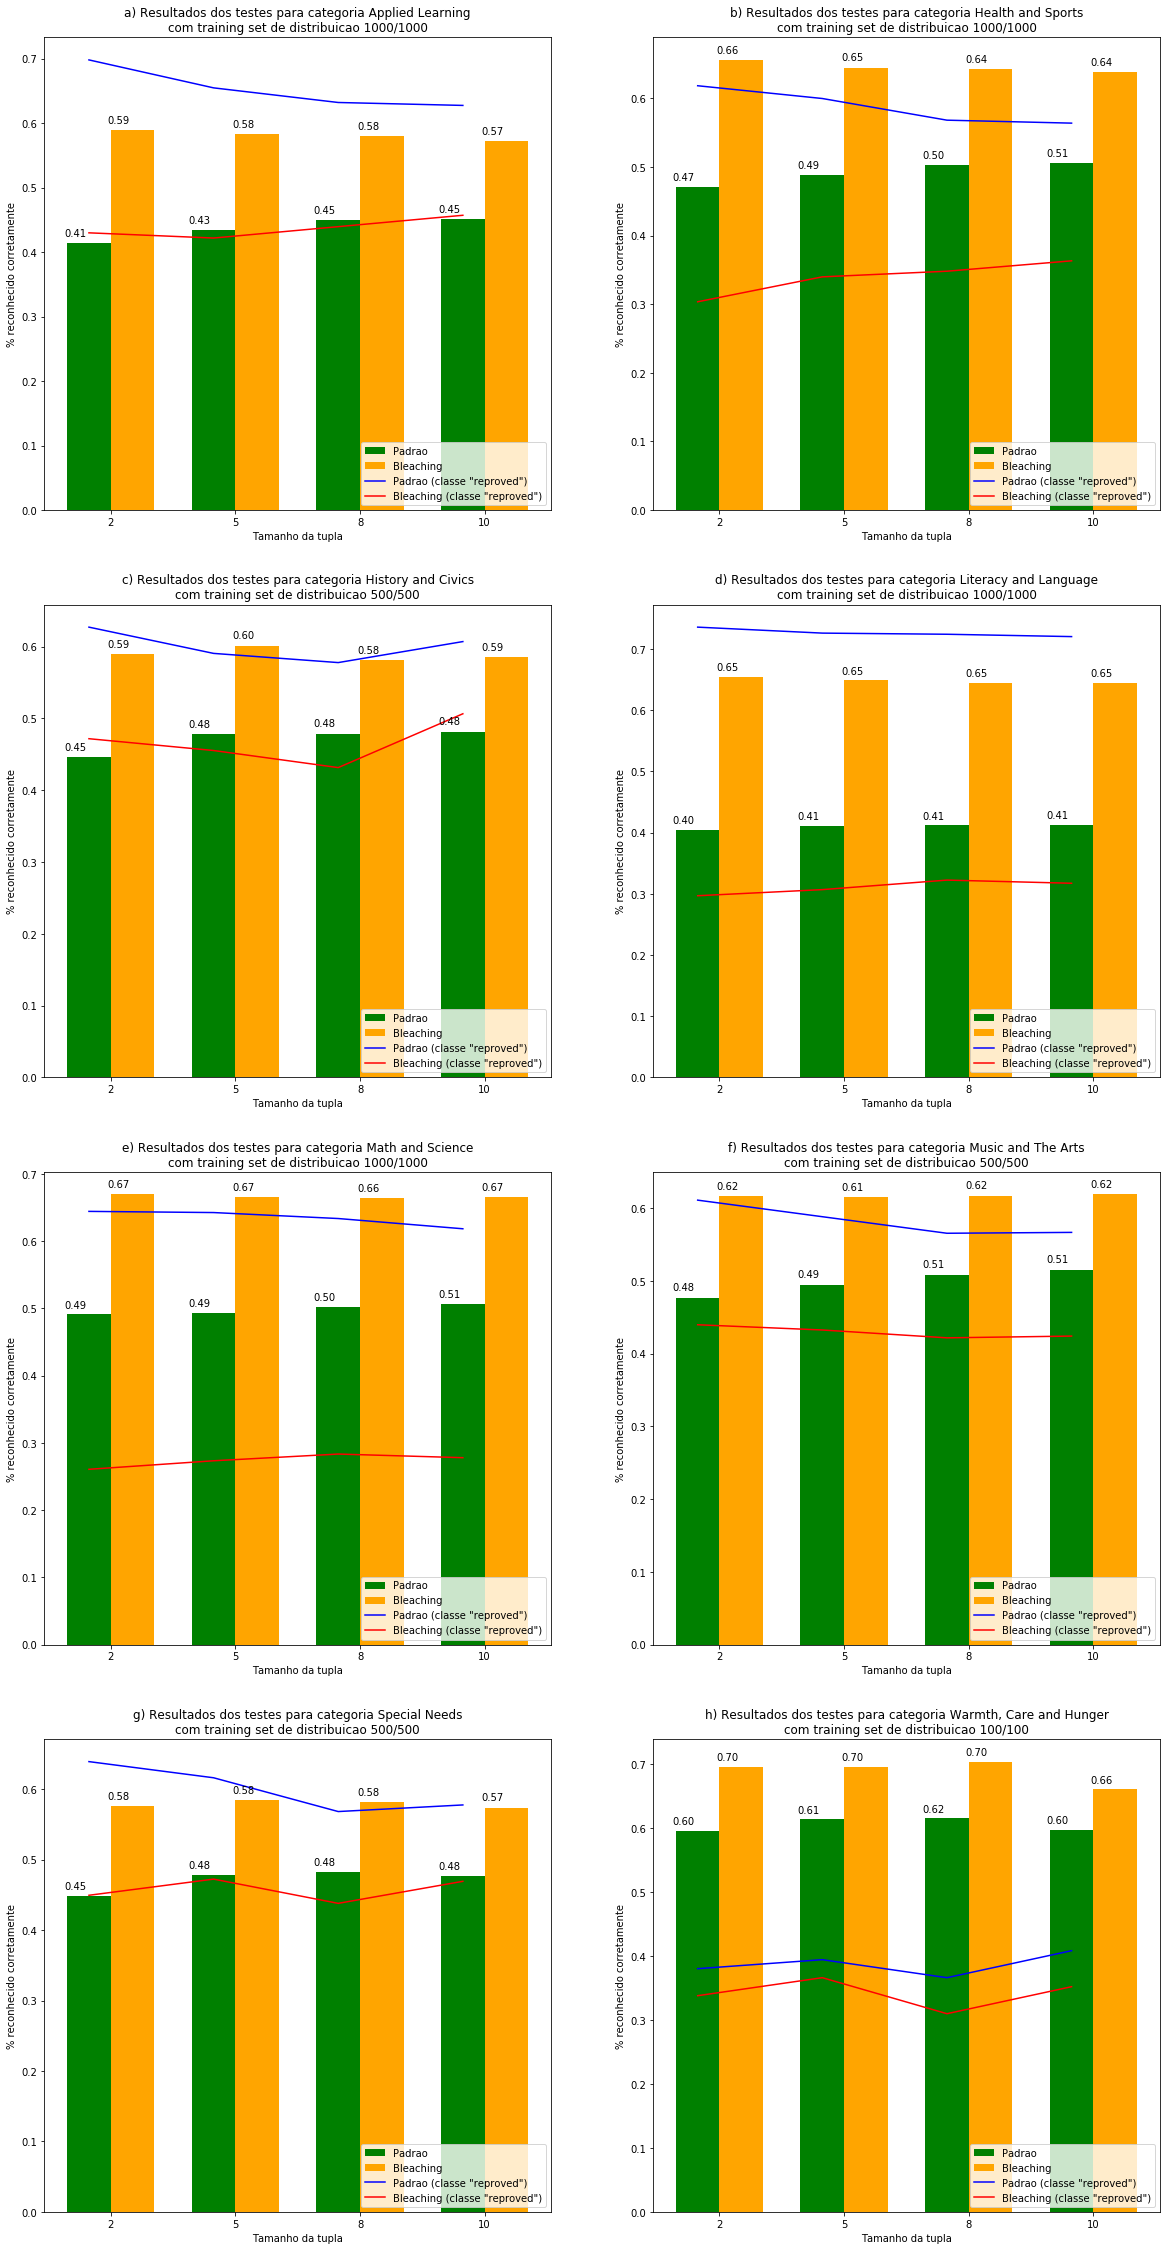

In [19]:
plot_data2(main_cats, categories_real_names, distributions, concatenated, "results_text_plus_other_data")

In [20]:
math = pd.read_csv("insights/results_experiment_only_text20180530190249.csv", sep=';', index_col=False)
health = pd.read_csv("insights/results_experiment_only_text20180523221905.csv", sep=';', index_col=False)
warmth = pd.read_csv("insights/results_experiment_only_text20180523195625.csv", sep=';', index_col=False)
special = pd.read_csv("insights/results_experiment_only_text20180523200818.csv", sep=';', index_col=False)
history = pd.read_csv("insights/results_experiment_only_text20180523213238.csv", sep=';', index_col=False)
music = pd.read_csv("insights/results_experiment_only_text20180523210313.csv", sep=';', index_col=False)
applied = pd.read_csv("insights/results_experiment_only_text20180524003654.csv", sep=';', index_col=False)
literacy = pd.read_csv("insights/results_experiment_only_text20180530211242.csv", sep=';', index_col=False)

In [21]:
#datasets = [applied, health, history, music, special, warmth]
#main_cats = ["applied", "health", "history", "music", "special", "warmth"]
#categories_real_names = ["Applied Learning", "Health and Sports", "History and Civics", 
#                        "Music and The Arts", "Special Needs", "Warmth, Care and Hunger"]
#distributions = ["1000/1000", "1000/1000", "500/500", "500/500", "500/500", "100/100"]
datasets = [applied, health, history, literacy, math, music, special, warmth]
main_cats = ["applied", "health", "history", "literacy", "math", "music", "special", "warmth"]
categories_real_names = ["Applied Learning", "Health and Sports", "History and Civics", 
                        "Literacy and Language", "Math and Science", "Music and The Arts", "Special Needs", "Warmth, Care and Hunger"]
distributions = ["1000/1000", "1000/1000", "500/500", "1000/1000", "1000/1000", "500/500", "500/500", "100/100"]

for i in range(len(datasets)):
    datasets[i]["main_cat_abrev"] =  main_cats[i]

concatenated = pd.concat(datasets, ignore_index=True)
concatenated

,data_distribution,tuple_size,bleaching_active,total_training_time,avg_in_sample_evaluation_time,total_in_sample_evaluation_time,avg_out_sample_evaluation_time,total_out_sample_evaluation_time,total_training_data,total_correct_training,...,wrongly_approved_test,percent_approved_correctly_test,total_reproved_test,correctly_reproved_test,wrongly_reproved_test,percent_reproved_correctly_test,total_ties,ties_for_zeros,ties_for_ones,main_cat_abrev
0,1000/1000,2,False,31.469764,0.023820,47.641377,0.022523,333.596392,2000,1663,...,614,0.370313,1984,1370,8077,0.690524,6390,987,5403,applied
1,1000/1000,2,True,30.253231,0.039391,78.783984,0.038802,574.700846,2000,1750,...,1148,0.620020,1984,836,4874,0.421371,0,0,0,applied
2,1000/1000,5,False,20.831431,0.015140,30.280922,0.016314,241.621882,2000,1756,...,662,0.395806,1984,1322,7750,0.666331,5716,895,4821,applied
3,1000/1000,5,True,24.364682,0.027317,54.634542,0.026293,389.433732,2000,1813,...,1172,0.623061,1984,812,4835,0.409274,0,0,0,applied
4,1000/1000,8,False,21.203480,0.013713,27.427124,0.013743,203.550993,2000,1831,...,724,0.413659,1984,1260,7521,0.635081,5055,745,4310,applied
5,1000/1000,8,True,21.074690,0.017804,35.608600,0.019495,288.734767,2000,1881,...,1133,0.616434,1984,851,4920,0.428931,0,0,0,applied
6,1000/1000,10,False,20.575484,0.013359,26.719543,0.013536,200.485262,2000,1867,...,689,0.415296,1984,1295,7500,0.652722,4801,737,4064,applied
7,1000/1000,10,True,21.471633,0.016666,33.333895,0.019090,282.741308,2000,1906,...,1119,0.610119,1984,865,5001,0.435988,0,0,0,applied
8,1000/1000,2,False,29.571980,0.021231,42.462644,0.021034,415.512404,2000,1724,...,892,0.459122,2312,1420,9434,0.614187,7820,1130,6690,health
9,1000/1000,2,True,29.932953,0.042055,84.112831,0.039406,778.428241,2000,1707,...,1614,0.713164,2312,698,5003,0.301903,0,0,0,health


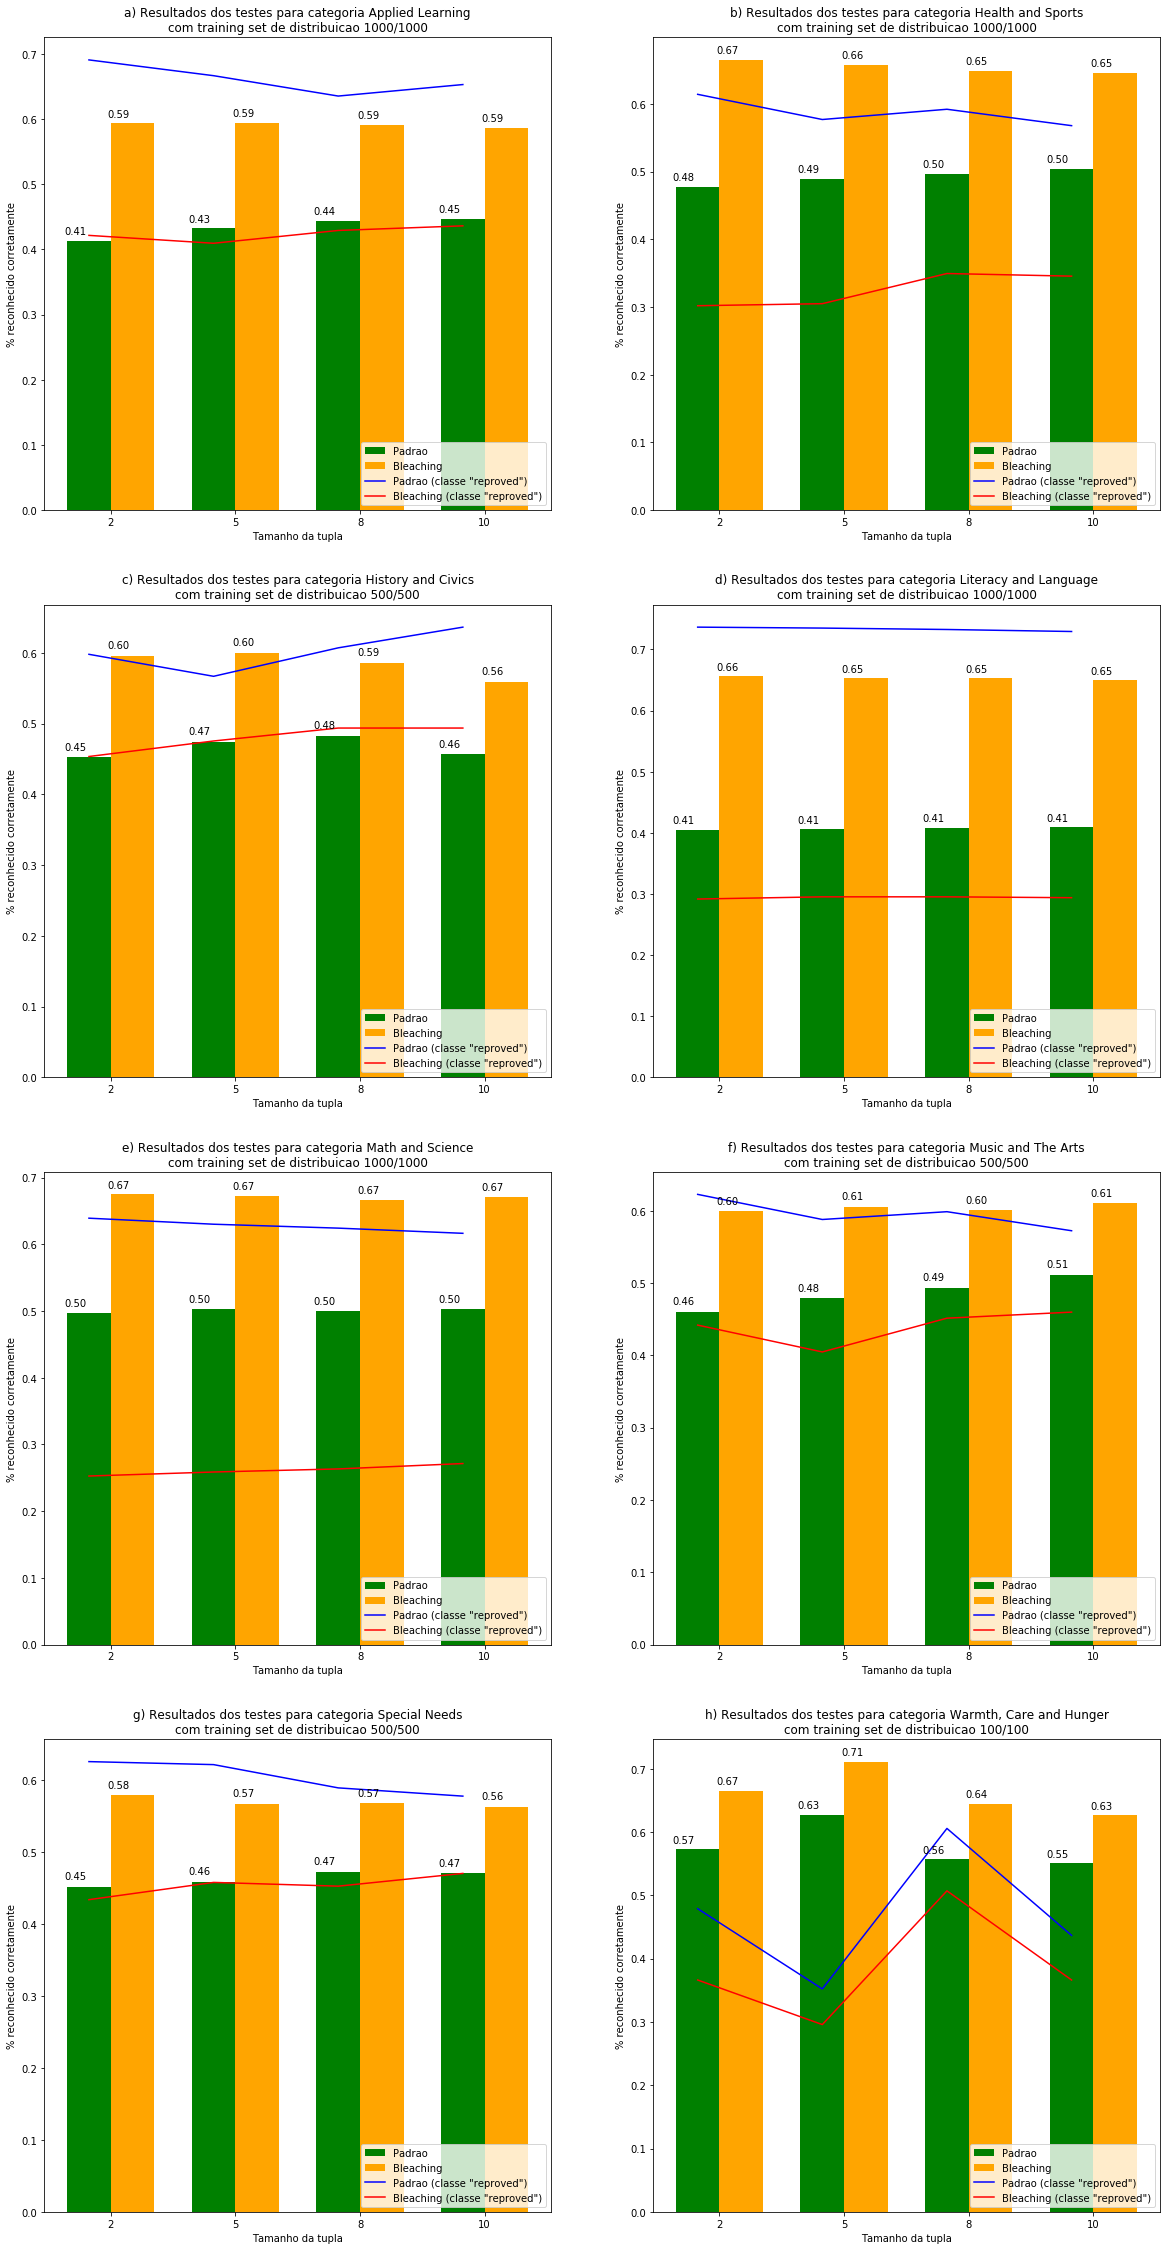

In [22]:
plot_data2(main_cats, categories_real_names, distributions, concatenated, "results_text_only")